# Summarizing metrics from disturbed XS +y

Leanne Friedrich 4/26/23

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_xsy_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [3]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'XS+ySDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolder
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnormd, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink_Ca, ink_CaInv, ink_diluent, ink_diluentWt, in

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


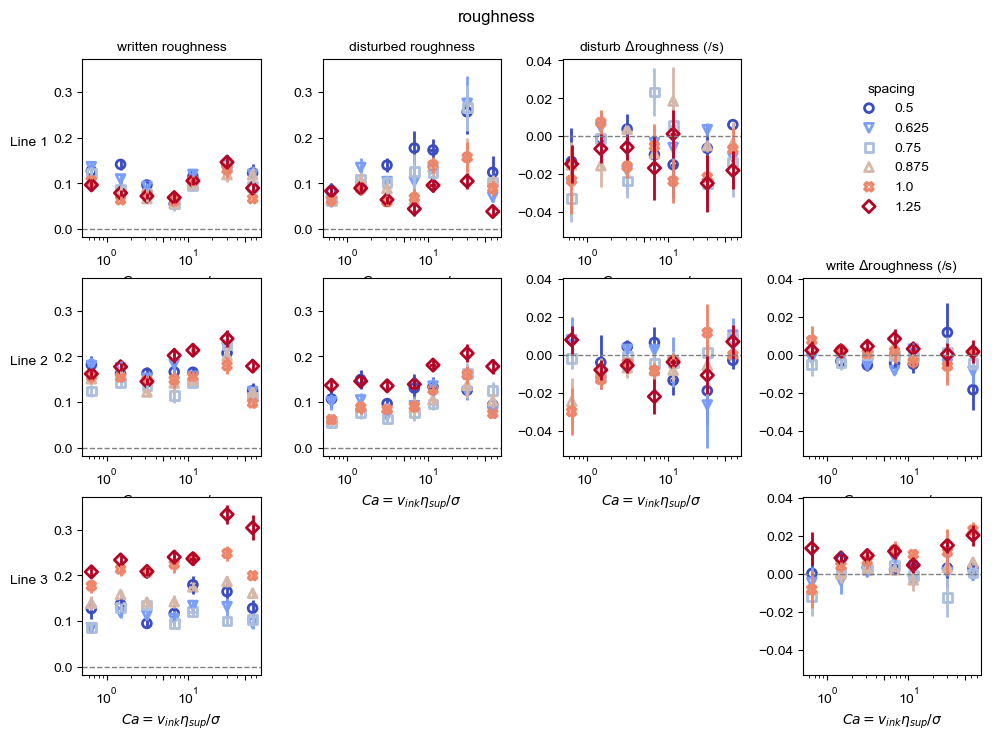

In [4]:
ssi = ms.ss
# ssi = ssi[~((ssi.ink_surfactantWt==0.05)&(ssi.ink_val==9))]
yvl = mp.yvarlines(ms, ssi, xvar='int_Ca', yvar='roughness', zvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.XSSDTIdeals('+y')
                   , logx=True, mode='scatter', dx=0.15)

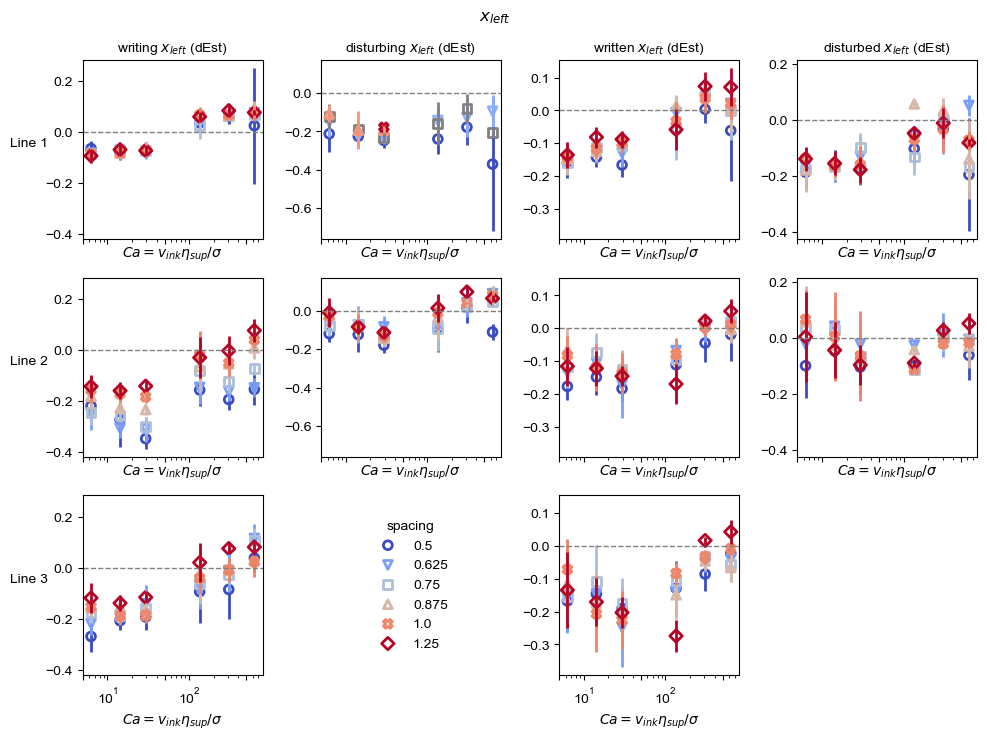

In [63]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='xLeft', zvar='spacing', llist=[1, 2, 3]
             , plist=['wp', 'dp', 'wo', 'do'], plotType='notebook', yideal=me.XSSDTIdeals('+y')
                   , logx=True, mode='scatter')

In [ ]:
m1 = ms.ss[ms.ss.spacing==0.75]
m1[m1.roughness_

In [135]:
yvar = 'roughness_w2o'
rows = ms.ss[(ms.ss[yvar]>0.3)]
rows[['ink_shortname','sup_shortname', 'int_Ca', 'spacing', yvar]]

,ink_shortname,sup_shortname,int_Ca,spacing,roughness_w2o
175,SO6-S20-0.5,3.0,134.69,0.75,0.39
179,SO6-S20-0.5,3.0,134.69,0.50,0.32
180,SO6-S20-0.5,3.0,134.69,0.62,0.33
197,SO6-S20-0.5,3.5,305.55,0.50,0.34


In [133]:
fh.openExplorer(rows.iloc[0]['printFolder'])

In [45]:
rgt = mp.regressionTables(ms, ms.ss, 'yBot_w3o', logy=False, printOut=True, export=False, package='tabular')

\begin{table}[H]
\centering
\caption[Linear regressions for 3rd written $y_{bottom}$ at nonzero surface tension.]{Table of linear regressions of log-scaled x variables and Spearman rank correlations for \textbf{3rd written $y_{bottom}$} at nonzero surface tension. For example, ${Re}_{ink}$ indicates a regression fit to $y = b*log_{10}(Re_{ink}) + c$. A Spearman rank correlation coefficient of -1 or 1 indicates a strong correlation. Variables are defined in table \ref{tab:variableDefs}.}
\label{tab:yBot_w3oRegNonZero}
\begin{tabular}{llrrll}
                                         variables &       $r^2$ &     b &      c & Spearman coeff &     Spearman p \\
                                           spacing &        0.03 &  0.10 &   0.23 &           0.15 &        5.1e-02 \\
		\hline
                                              $Ca$ &        0.04 &  0.04 &   0.24 &           0.07 &        3.6e-01 \\
                                        $Ca_{ink}$ &        0.02 & -0.02 &   0.31 &    